## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import sklearn
from numpy import *

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [3]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

In [4]:
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


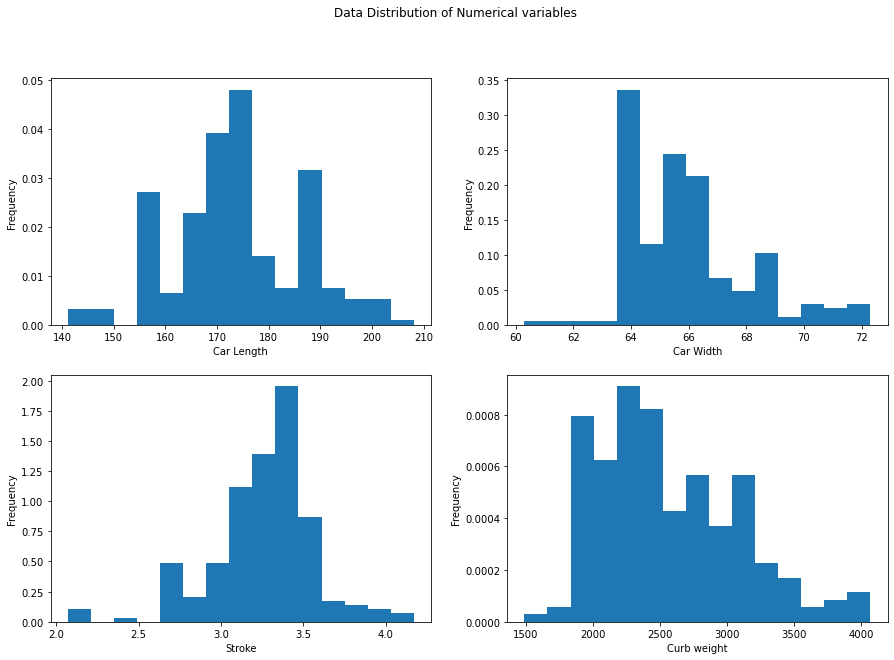

In [5]:
plt.figure(figsize = [15, 10]) 


plt.subplot(2, 2, 1) # 2 row, 2 cols, subplot 1
plt.hist(np.array(car_price_df['carlength']), density=True, bins = 15)  
plt.ylabel('Frequency')
plt.xlabel('Car Length');

plt.subplot(2, 2, 2) # 2 row, 2 cols, subplot 2
plt.hist(np.array(car_price_df['carwidth']), density = True, bins = 15)
plt.ylabel('Frequency')
plt.xlabel('Car Width');

plt.subplot(2, 2, 3) # 2 row, 2 cols, subplot 3
plt.hist(np.array(car_price_df['stroke']), density = True, bins = 15)
plt.ylabel('Frequency')
plt.xlabel('Stroke');

plt.subplot(2, 2, 4) # 2 row, 2 cols, subplot 4
plt.hist(np.array(car_price_df['curbweight']), density = True, bins = 15)
plt.ylabel('Frequency')
plt.xlabel('Curb weight');

plt.suptitle('Data Distribution of Numerical variables')
plt.show()

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


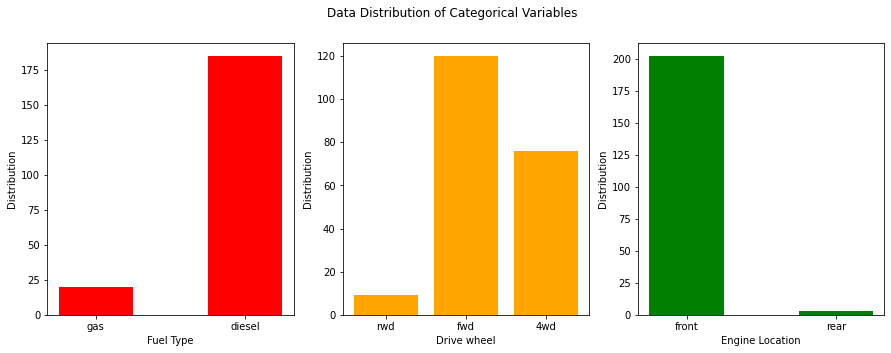

In [6]:
### Code here

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1
x = car_price_df['fueltype'].unique()
y = np.array(car_price_df.groupby(['fueltype'])['fueltype'].count())
plt.bar(x, y, color ='red', width = 0.5) 
plt.xlabel("Fuel Type")
plt.ylabel("Distribution")

plt.subplot(1, 3, 2)
x = car_price_df['drivewheel'].unique()
y = np.array(car_price_df.groupby(['drivewheel'])['drivewheel'].count())
plt.bar(x, y, color ='orange', width = 0.8)
plt.xlabel("Drive wheel")
plt.ylabel("Distribution")

plt.subplot(1, 3, 3)
x = car_price_df['enginelocation'].unique()
y = np.array(car_price_df.groupby(['enginelocation'])['enginelocation'].count())
plt.bar(x, y, color ='green', width = 0.5)
plt.xlabel("Engine Location")
plt.ylabel("Distribution")


plt.suptitle('Data Distribution of Categorical Variables')
plt.show()

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

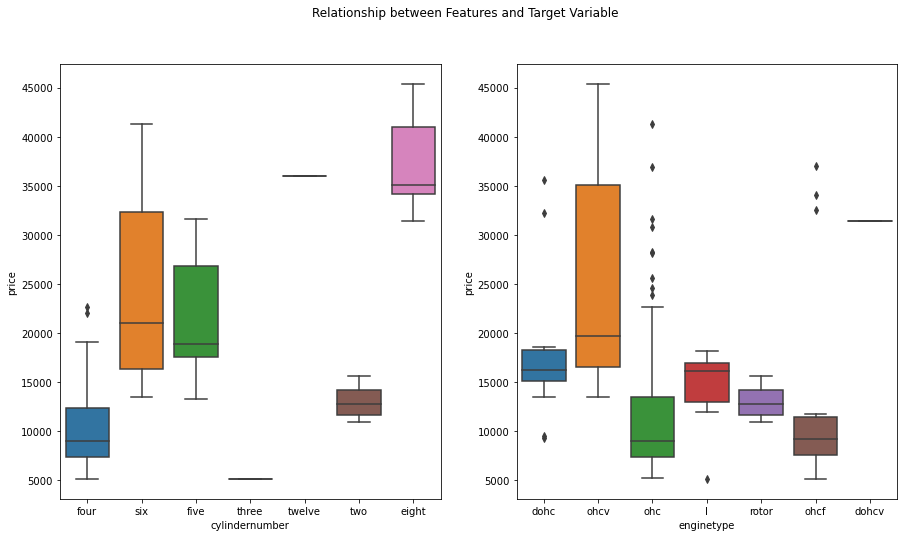

In [7]:
### Code here

plt.figure(figsize = [15, 8]) 

plt.subplot(1, 2, 1) # 2 row, 2 cols, subplot 1
sns.boxplot(x = car_price_df["cylindernumber"], y = car_price_df['price'])

plt.subplot(1, 2, 2) # 2 row, 2 cols, subplot 1
sns.boxplot(x = car_price_df["enginetype"], y = car_price_df['price'])


plt.suptitle('Relationship between Features and Target Variable')
plt.show()

<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

In [8]:
#### Comment here

print("Car Length is symmetric about the median. Car width is skewed to the right with most of the data on the left. Stroke is slightly left skewed and Curb Weight is right skewed with maximum data on the left of the mean. To conclude the data doesn't have a uniform distribution.\n")
print("Our data has an imbalance in the number of car models based on type of fuel, location of engine and kind of drivewheel. The ratio of cars with diesel, four wheel and front wheel drive and engine located in the front is way more than the cars with gas, rear wheel drive and engine in the rear.\n")
print("While cars with eight cylinders are the most expensive ones, the ones with four cylinders are the most economic cars with a few exceptions. Cars with six cylinders fall in a huge price range making them affordable for more people. Cars with ohcv type engine are the most expensive but have a wider price range. ohc type engine cars are more affordable but there are some expensive models as well.")

Car Length is symmetric about the median. Car width is skewed to the right with most of the data on the left. Stroke is slightly left skewed and Curb Weight is right skewed with maximum data on the left of the mean. To conclude the data doesn't have a uniform distribution.

Our data has an imbalance in the number of car models based on type of fuel, location of engine and kind of drivewheel. The ratio of cars with diesel, four wheel and front wheel drive and engine located in the front is way more than the cars with gas, rear wheel drive and engine in the rear.

While cars with eight cylinders are the most expensive ones, the ones with four cylinders are the most economic cars with a few exceptions. Cars with six cylinders fall in a huge price range making them affordable for more people. Cars with ohcv type engine are the most expensive but have a wider price range. ohc type engine cars are more affordable but there are some expensive models as well.


------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
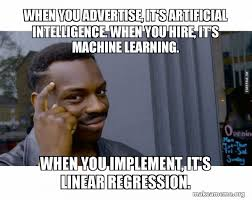



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [9]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
mu, sigma = 0, 4 
epsilon = np.random.normal(mu, sigma, 100)
y = (7 * X) - 8 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

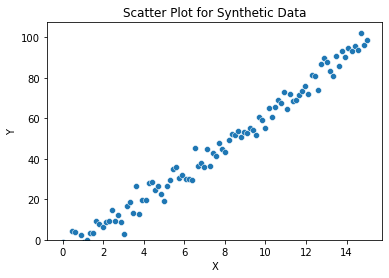

In [10]:
### Code here

f, ax = plt.subplots(1)
ax = sns.scatterplot(x=X, y=y)
ax.set_ylim(ymin=0)
plt.title("Scatter Plot for Synthetic Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show(f)

In [11]:
#### Comment here
print("Yes, the features have a linear relationship.")

Yes, the features have a linear relationship.


### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [12]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

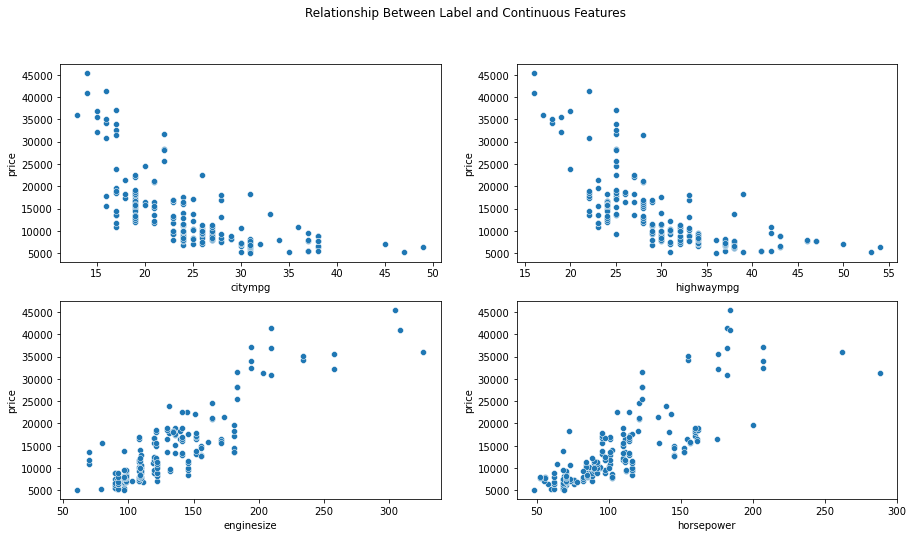

In [13]:
### Code here

plt.figure(figsize = [15, 8]) 

plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
sns.scatterplot(data = car_price_X, x='citympg', y=car_price_y)

plt.subplot(2, 2, 2) # 2 rows, 2 cols, subplot 2
sns.scatterplot(data = car_price_X, x='highwaympg', y=car_price_y)

plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
sns.scatterplot(data = car_price_X, x='enginesize', y=car_price_y)

plt.subplot(2, 2, 4) # 2 rows, 2 cols, subplot 4
sns.scatterplot(data = car_price_X, x='horsepower', y=car_price_y)


plt.suptitle("Relationship Between Label and Continuous Features")
plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [14]:
#### Comment here

print("In all the four plots, most of the data lies close to the x=y equation and thus shows a good linearity. And so linear regression is a good model for this problem.")

In all the four plots, most of the data lies close to the x=y equation and thus shows a good linearity. And so linear regression is a good model for this problem.


### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [15]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [16]:
# Checking data types to identify categorical variables.

car_price_X.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [17]:
# Encoding the categorical variables using Ordinal Encoder.

enc = OrdinalEncoder()
car_price_X[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']] = enc.fit_transform(car_price_X[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']])
car_price_X


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,2.0,130,5.0,3.47,2.68,9.0,111,5000,21,27
1,2,3,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,2.0,130,5.0,3.47,2.68,9.0,111,5000,21,27
2,3,1,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,...,3.0,152,5.0,2.68,3.47,9.0,154,5000,19,26
3,4,2,4.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,2.0,109,5.0,3.19,3.40,10.0,102,5500,24,30
4,5,2,5.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,1.0,136,5.0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,2.0,141,5.0,3.78,3.15,9.5,114,5400,23,28
201,202,-1,138.0,1.0,1.0,0.0,3.0,2.0,0.0,109.1,...,2.0,141,5.0,3.78,3.15,8.7,160,5300,19,25
202,203,-1,140.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,3.0,173,5.0,3.58,2.87,8.8,134,5500,18,23
203,204,-1,142.0,0.0,1.0,0.0,3.0,2.0,0.0,109.1,...,3.0,145,3.0,3.01,3.40,23.0,106,4800,26,27


**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

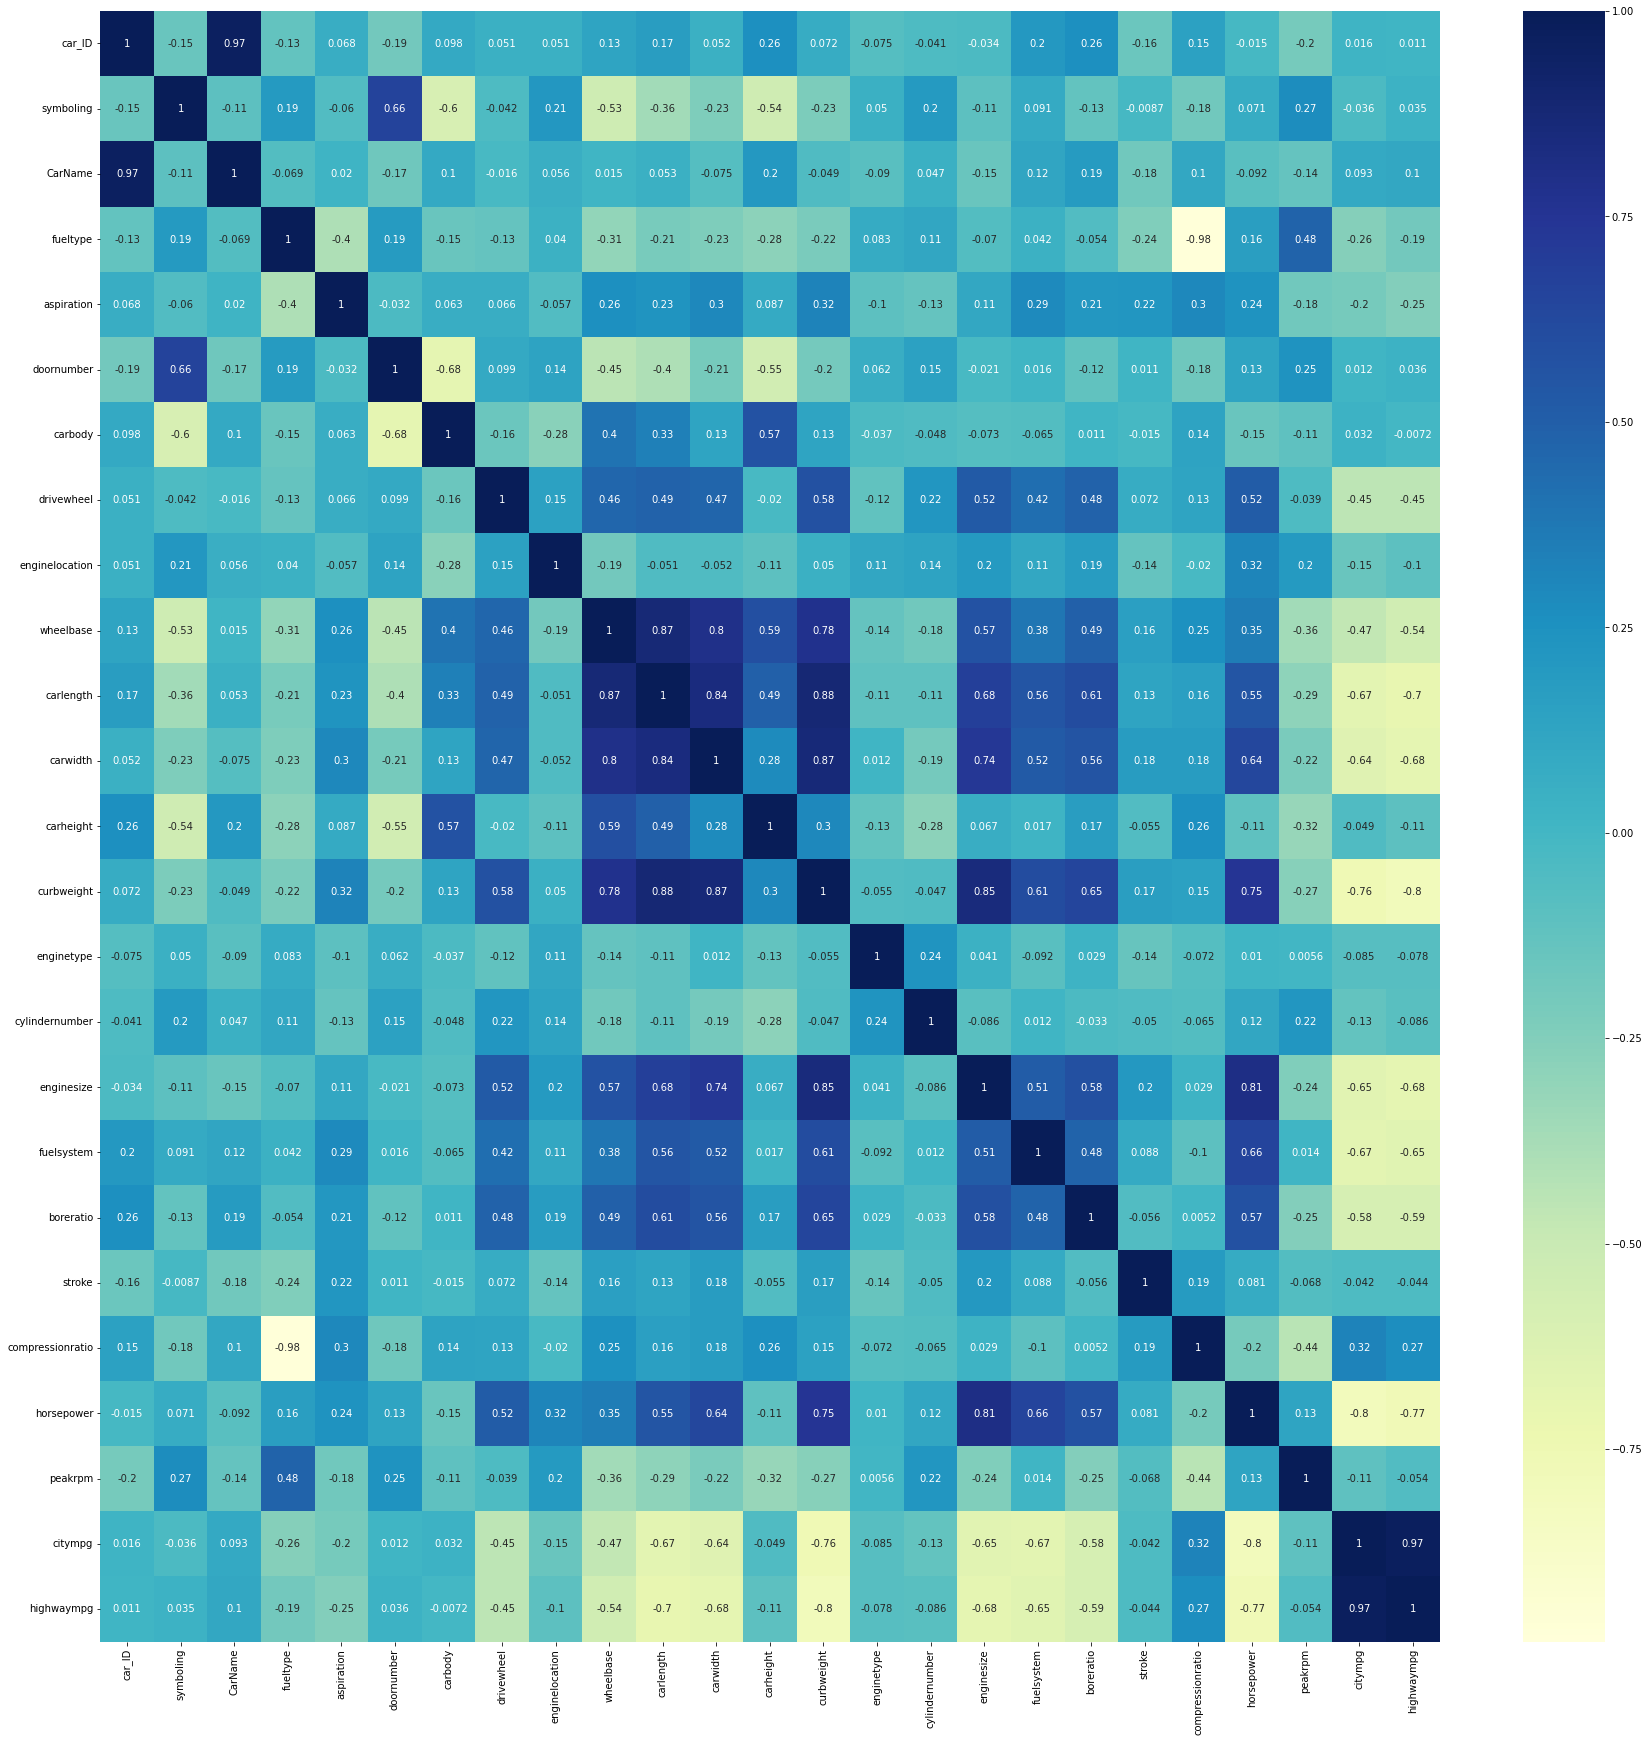

In [18]:
plt.figure(figsize = [30, 30]) 
dataplot = sns.heatmap(car_price_X.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
# Dropping columns with high correlation.

corr_matrix = car_price_X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
car_price_X.drop(to_drop, axis=1, inplace=True)

/var/folders/yr/pvzhzlb12ggccgzxtvy9vwjh0000gn/T/ipykernel_22373/3507706344.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


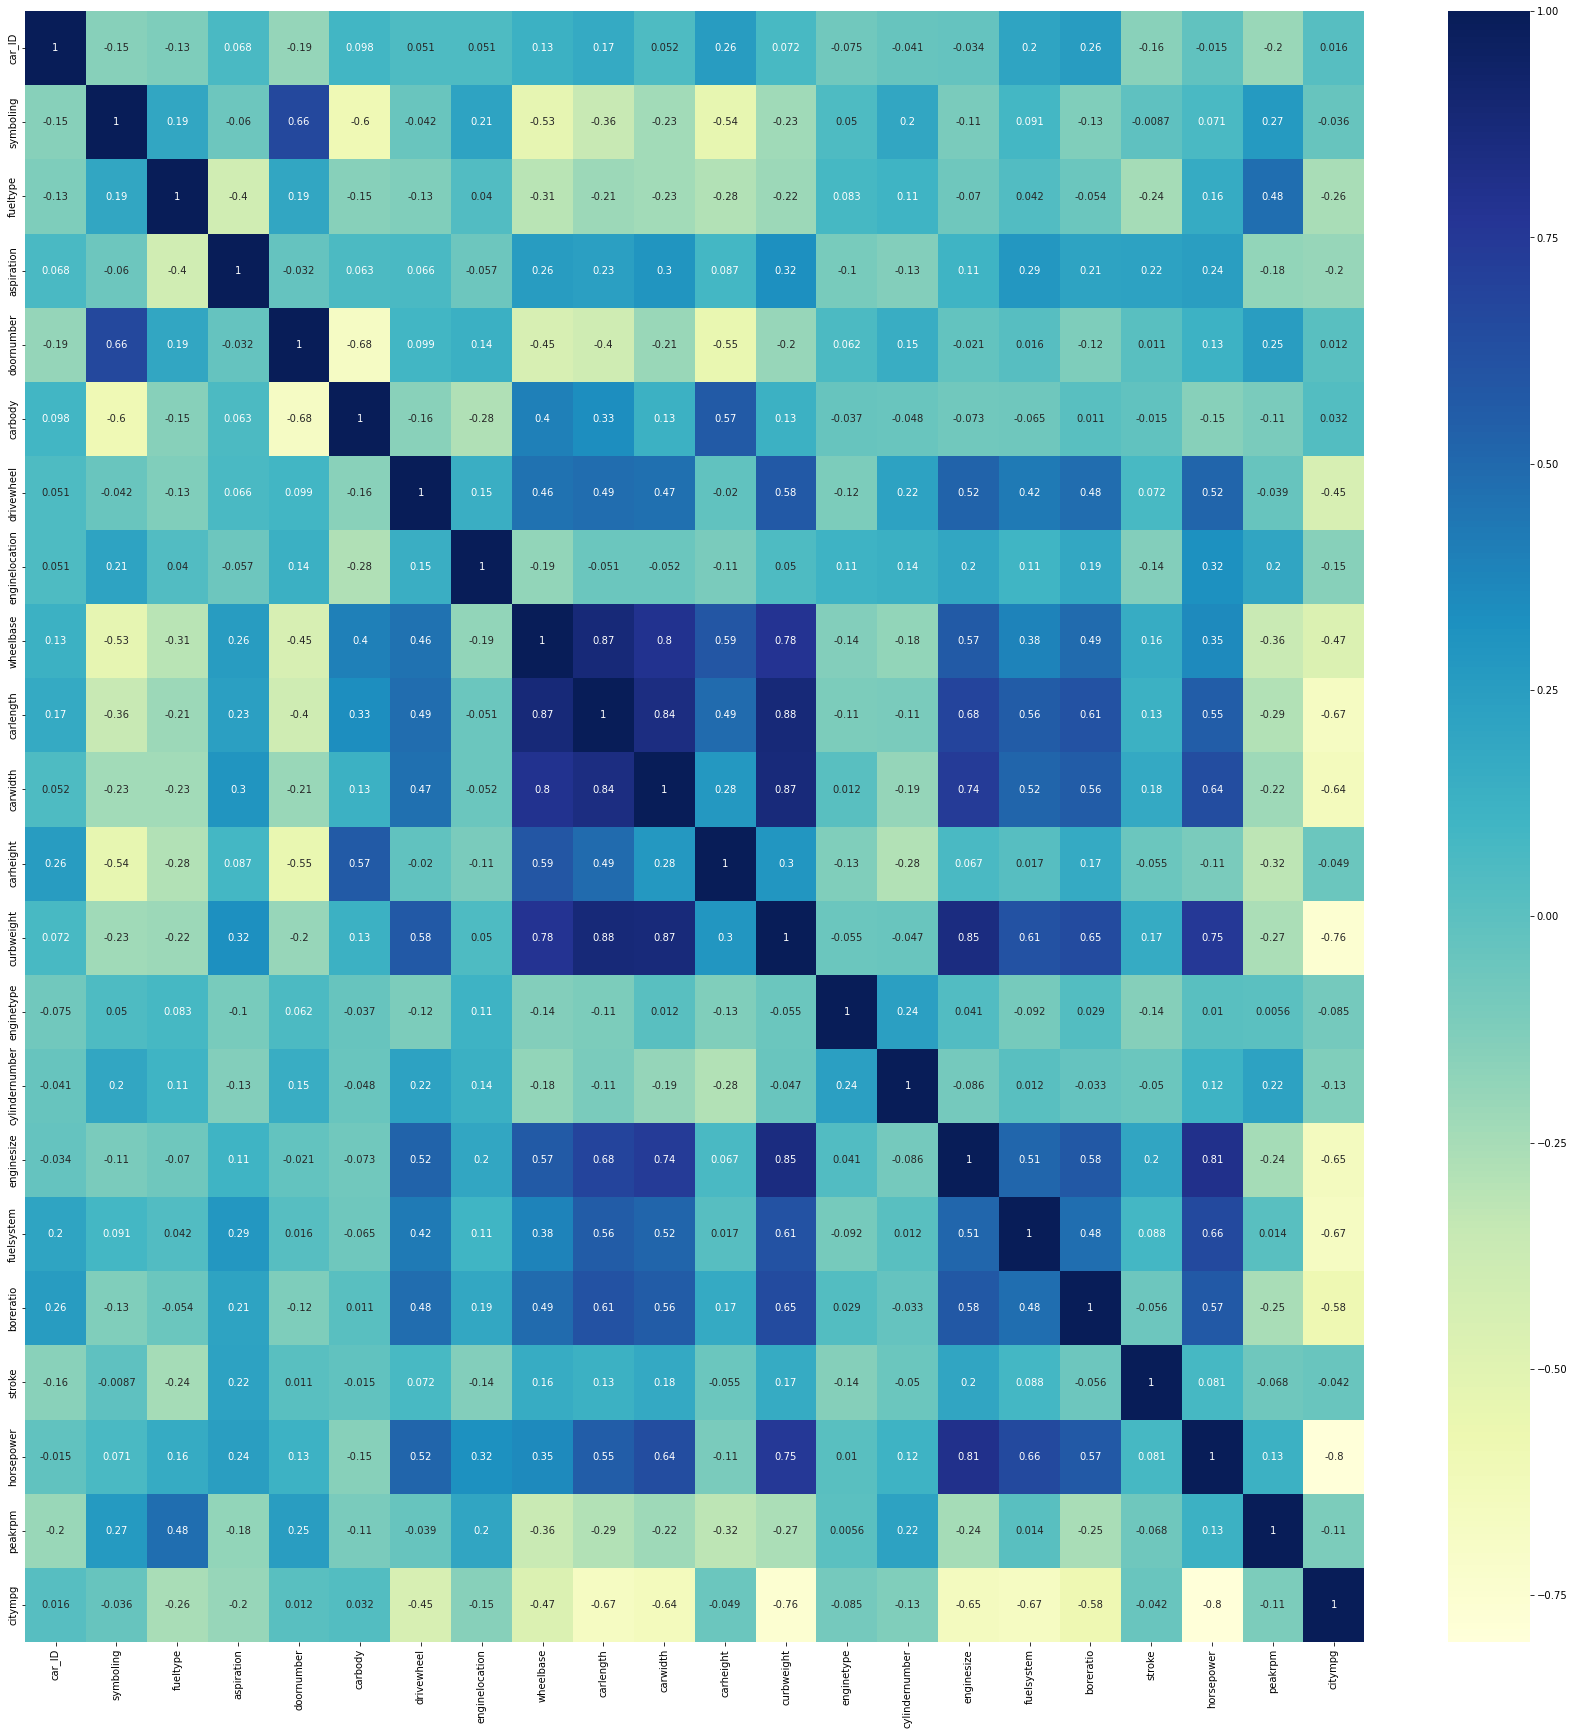

In [20]:
plt.figure(figsize = [30, 30]) 
dataplot = sns.heatmap(car_price_X.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [21]:
car_price_X

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg
0,1,3,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,...,2548,0.0,2.0,130,5.0,3.47,2.68,111,5000,21
1,2,3,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,...,2548,0.0,2.0,130,5.0,3.47,2.68,111,5000,21
2,3,1,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,...,2823,5.0,3.0,152,5.0,2.68,3.47,154,5000,19
3,4,2,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,...,2337,3.0,2.0,109,5.0,3.19,3.40,102,5500,24
4,5,2,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,...,2824,3.0,1.0,136,5.0,3.19,3.40,115,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1.0,0.0,0.0,3.0,2.0,0.0,109.1,188.8,...,2952,3.0,2.0,141,5.0,3.78,3.15,114,5400,23
201,202,-1,1.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,...,3049,3.0,2.0,141,5.0,3.78,3.15,160,5300,19
202,203,-1,1.0,0.0,0.0,3.0,2.0,0.0,109.1,188.8,...,3012,5.0,3.0,173,5.0,3.58,2.87,134,5500,18
203,204,-1,0.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,...,3217,3.0,3.0,145,3.0,3.01,3.40,106,4800,26


**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [22]:
### Code here

car_X_dev, car_X_test, car_y_dev, car_y_test = train_test_split(car_price_X, car_price_y, test_size=0.2, random_state=0)
car_X_train, car_X_val, car_y_train, car_y_val = train_test_split(car_X_dev, car_y_dev, test_size=0.25, random_state=0)


**2.1.8 Standardize the columns in the feature matrices.**

In [23]:
### Code here

scaler = StandardScaler()
car_X_train = scaler.fit_transform(car_X_train)   
car_X_val = scaler.transform(car_X_val)       
car_X_test = scaler.transform(car_X_test)   

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [24]:
### Code here

car_X_train = np.hstack([np.ones((car_X_train.shape[0], 1)), car_X_train])
car_X_val = np.hstack([np.ones((car_X_val.shape[0], 1)), car_X_val])
car_X_test = np.hstack([np.ones((car_X_test.shape[0], 1)), car_X_test])

print(car_X_train[:5], '\n\n', car_y_train[:5])

[[ 1.         -0.95500948  0.17546752  0.372678   -0.49236596  1.25
   0.4044824  -0.51671684 -0.12856487 -0.40974726 -0.46851364 -0.00339972
  -1.15016334 -0.55669184 -0.16183258 -0.12381514 -0.43428753 -1.04682798
  -0.66854906  1.03549495 -0.09942571  0.83916558  0.00909065]
 [ 1.         -1.44488923  0.17546752  0.372678   -0.49236596 -0.8
   0.4044824   1.24873236 -0.12856487  0.75843946  1.19517538  0.41476539
   0.71966069  0.89378352 -0.16183258  1.04766656  0.82259167  0.95721625
  -0.08766405 -0.25186264  0.44932771 -1.77525606 -0.78958775]
 [ 1.          1.79181626 -1.48472517  0.372678    2.0310096  -0.8
   1.58903799  1.24873236 -0.12856487  0.89194651  1.17845488  0.55415375
   1.43576351  1.08794163 -0.16183258 -0.12381514  0.03122329  0.95721625
   1.03780065 -0.38389932  1.52070343  0.00255066 -1.26879479]
 [ 1.         -0.64008678 -0.65462882  0.372678   -0.49236596 -0.8
   0.4044824  -0.51671684 -0.12856487 -0.02591448  0.25882779  0.22891423
   0.64009371 -0.3339810

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [25]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        
        X_t = np.transpose(X)
        X_T = np.dot(X_t, X)
        a_I = self.alpha * np.eye(X_T.shape[0])

        prod1 = np.linalg.inv(X_T + a_I)
        prod2 = np.dot(prod1, X_t)

        # multiply together
        self.w = np.dot(prod2,y)          
        
        pass
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        
        y_pred = np.dot(X, self.w)
        return y_pred
    
        pass
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [26]:
### Code here

lr = LinearRegression(alpha = 0)
lr.train(X_train, y_train)
print(lr.w, '\n')

y = lr.predict(X_test)
print("Predicted first 3:", y[0:3])
print("Actual first 3:", y_test[0:3])
print('-'*60)
print("Predicted last 3:", y[-3:])
print("Actual last 3:", y_test[-3:])

[46.05572051 29.15819725] 

Predicted first 3: [19.79646675 82.65106352 -5.34537196]
Actual first 3: [19.75879164 87.9272395  -1.96383594]
------------------------------------------------------------
Predicted last 3: [17.70131352 27.12950304  0.94008772]
Actual last 3: [26.53356395 19.07681413  0.07197308]


**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

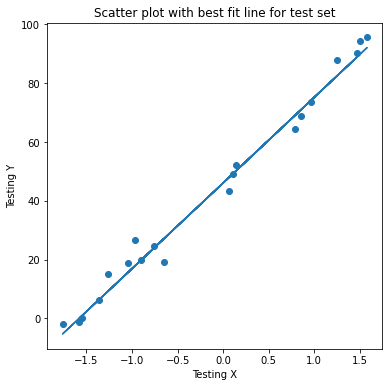

In [27]:
### Code here

fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(x = X_test[:,1], y = y_test)
ax.plot(X_test[:,1], y)

plt.title("Scatter plot with best fit line for test set")
plt.xlabel("Testing X")
plt.ylabel("Testing Y")
plt.show()

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [28]:
### Code here

lr_car = LinearRegression(alpha = 1e-13)
lr_car.train(car_X_train, car_y_train)
car_y_pred = lr_car.predict(car_X_test)

print("Predicted first 3:", car_y_pred[0:3])
print("Actual first 3:", car_y_test[0:3])
print('-'*70)
print("Predicted last 3:", car_y_pred[-3:])
print("Actual last 3:", car_y_test[-3:])

Predicted first 3: [ 6126.61017059 17685.03457417 14332.8292701 ]
Actual first 3: 52      6795.0
181    15750.0
5      15250.0
Name: price, dtype: float64
----------------------------------------------------------------------
Predicted last 3: [ 6744.85319817 36923.29197513  5497.50705946]
Actual last 3: 22     6377.0
74    45400.0
44     8916.5
Name: price, dtype: float64


In [29]:
print("R2 for training: ", r2_score(car_y_train, lr_car.predict(car_X_train)))
print("R2 for test: ", r2_score(car_y_test, lr_car.predict(car_X_test)))
print("R2 for val: ", r2_score(car_y_val, lr_car.predict(car_X_val)))

R2 for training:  0.9157968258673834
R2 for test:  0.8078852226838326
R2 for val:  0.8767295280537641


**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [30]:
### Code here

avg = np.mean(car_y_train)
baseline_pred = np.full((len(car_X_train), 1), avg)
print("R2 for training: ", r2_score(car_y_train, baseline_pred))
print("R2 for test: ", r2_score(car_y_test, np.full((len(car_X_test), 1), avg)))
print("R2 for val: ", r2_score(car_y_val, np.full((len(car_X_val), 1), avg)))

R2 for training:  0.0
R2 for test:  -0.0028042246944892657
R2 for val:  -0.04252409813108615


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [31]:
features = []
features = car_price_X.columns
features = features.insert(0,'bias')
features

Index(['bias', 'car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')

In [32]:
lr_car.w

array([13630.33469106,  -902.25712308,   270.75507153,  -317.84867257,
          31.39350194,  -815.7456228 ,  -804.16792777,   775.03284725,
        1824.69179453,  1162.63064214,  -265.90716902,  1101.60111435,
          76.76947451,  2494.05587146,   283.85245395,  -139.10769541,
        2590.3259889 ,   -56.3220299 ,  -694.65724356,  -827.09250537,
         798.07743633,   534.37072057,  -147.43617824])

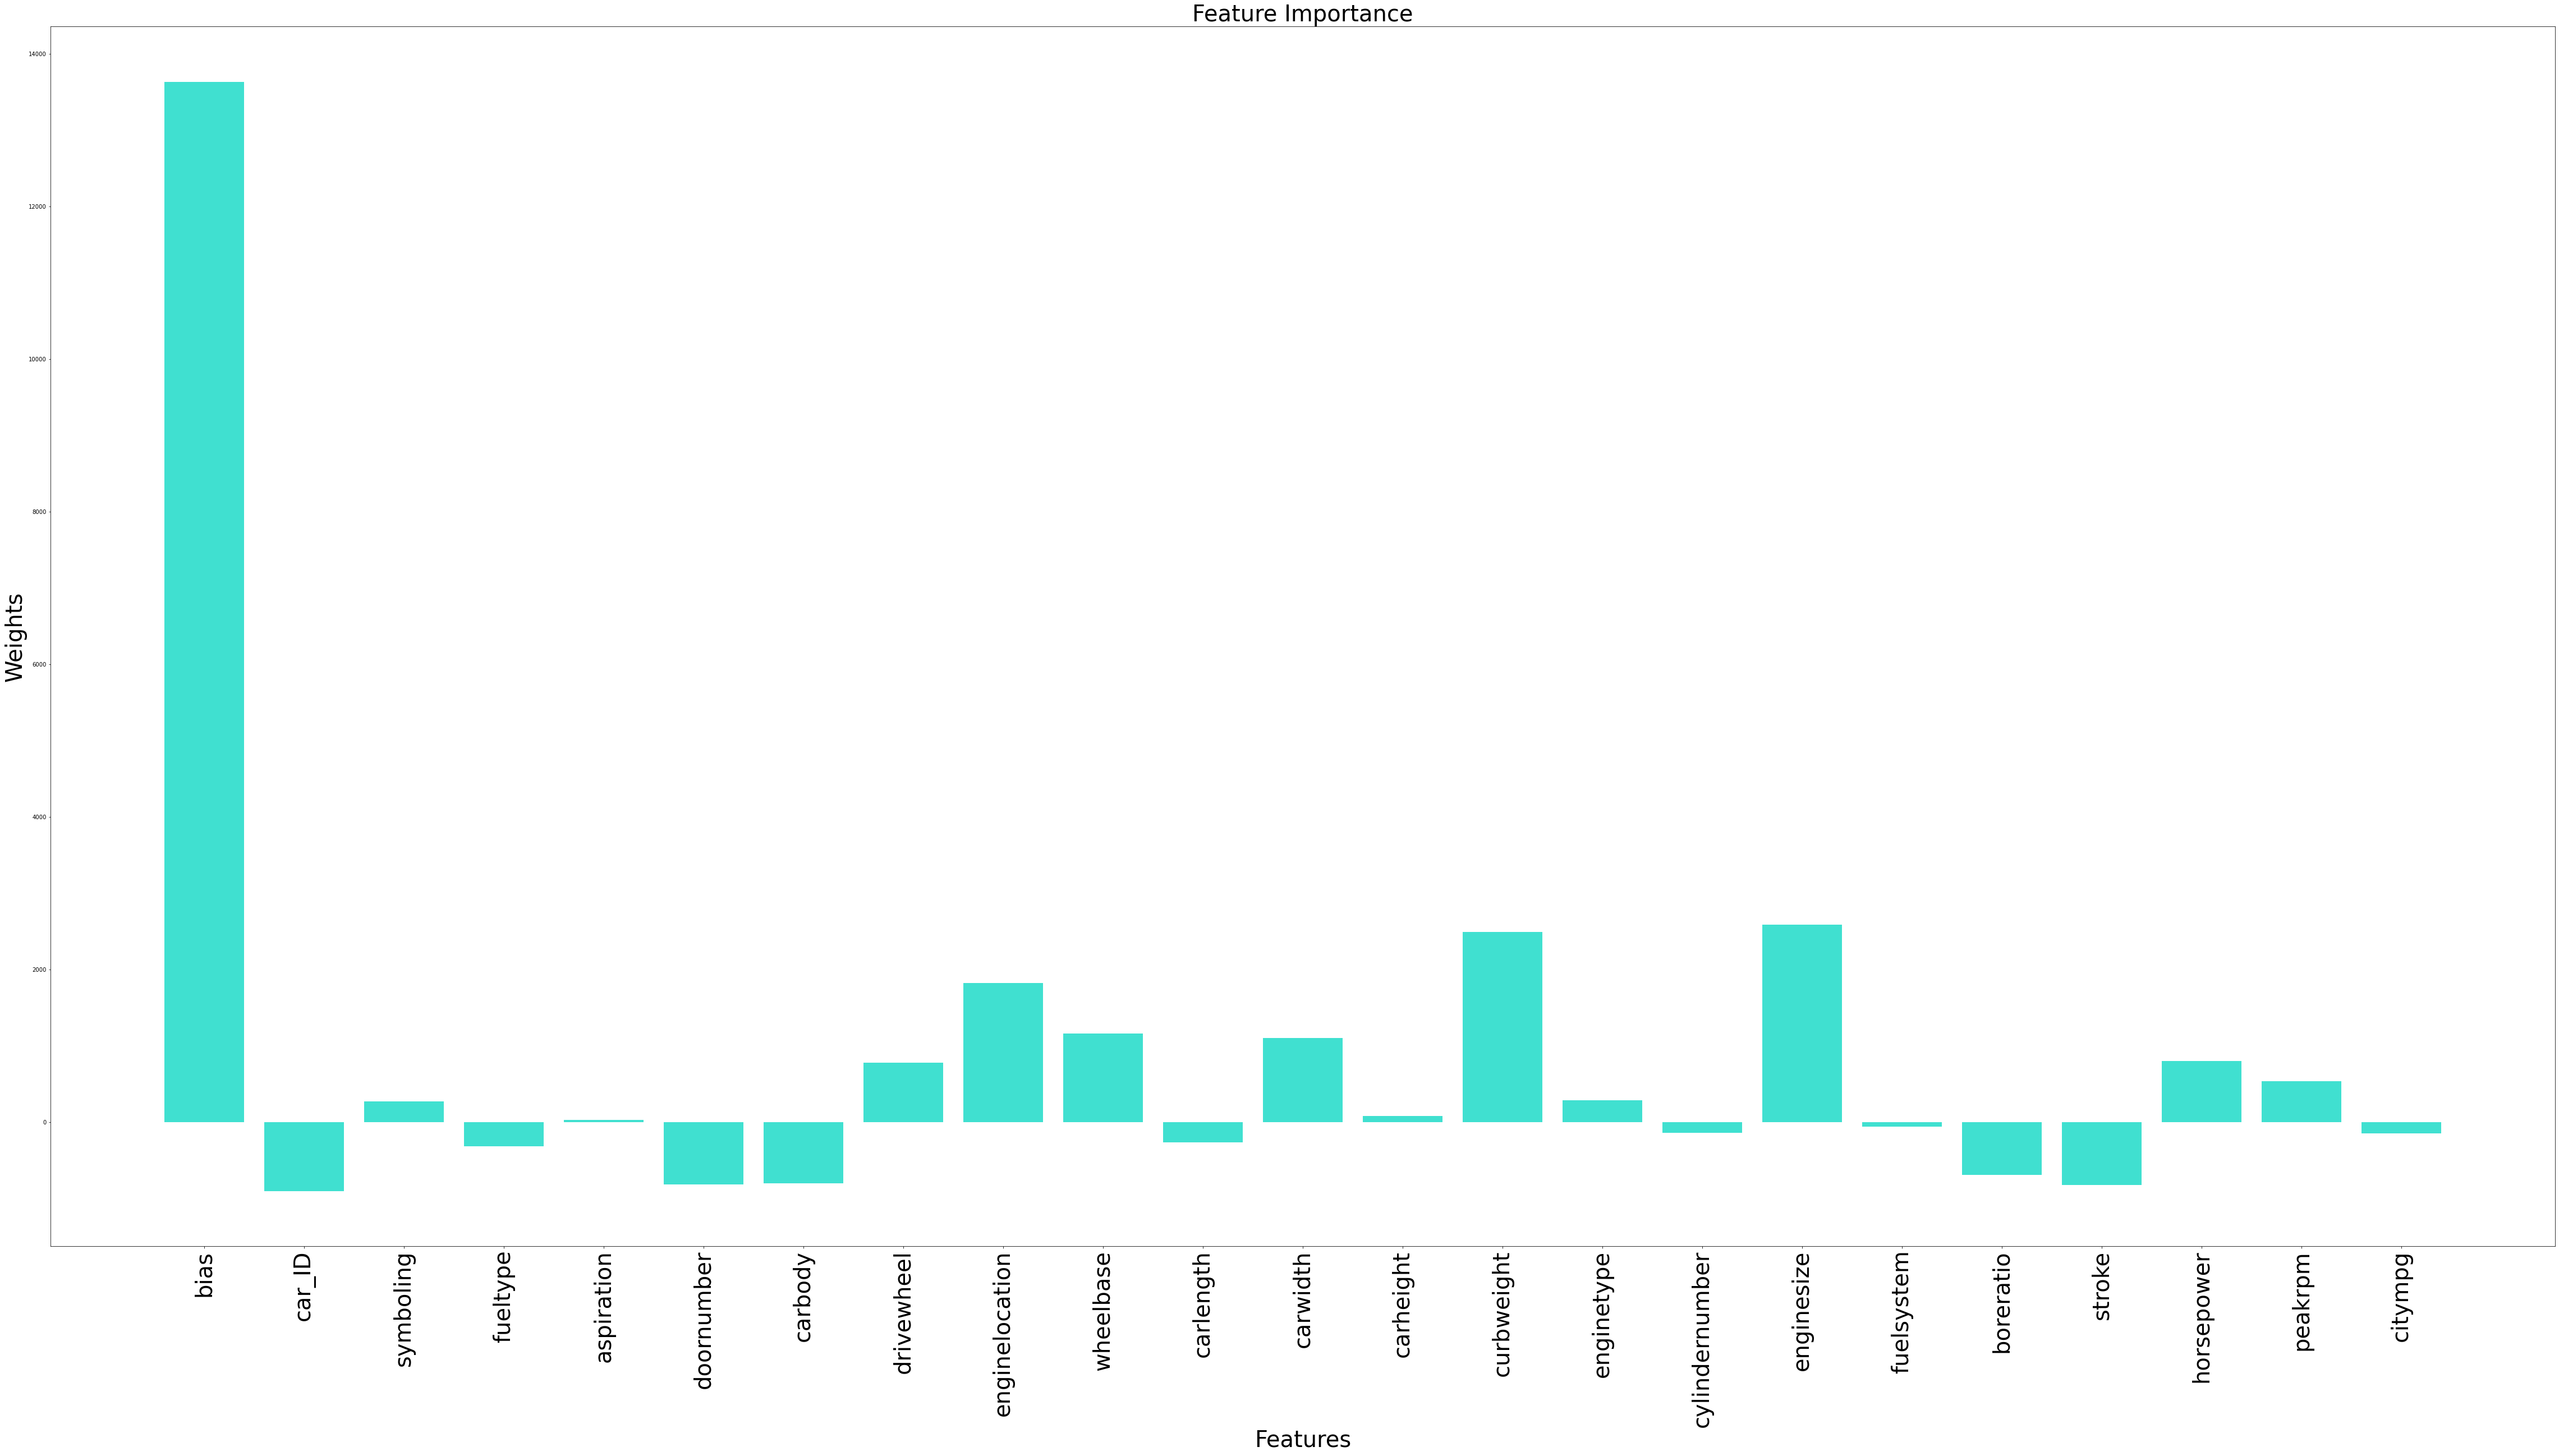

In [33]:
### Code here

plt.figure(figsize = [80, 40]) 
x = features
y = lr_car.w
plt.bar(x, y, color ='turquoise') 

plt.xlabel("Features", fontsize=40)
plt.ylabel("Weights", fontsize=40)
plt.title("Feature Importance", fontsize=40)
plt.xticks(rotation=90, fontsize=40)

plt.show()

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

In [34]:
#### Comment here

print("Apart from the bias, enginesize and curbweight are the greatest contributors.")

Apart from the bias, enginesize and curbweight are the greatest contributors.


### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

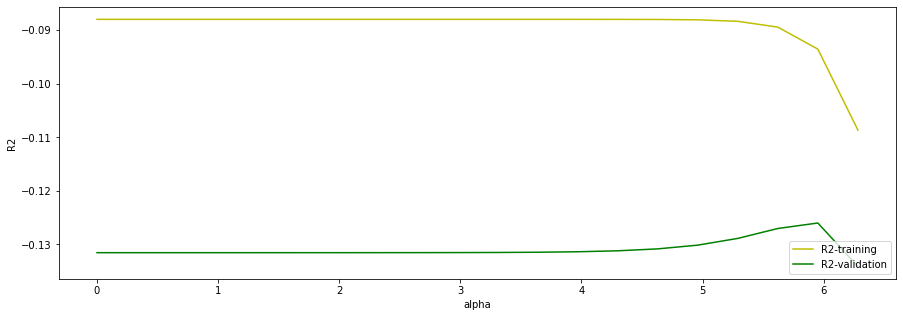

In [35]:
### Code here
alpha = np.logspace(-5,1,20)

r1 = [] # To record scores for training data
r2 = [] # To record scores for validation data

for a in alpha:
    lr_car = LinearRegression(alpha = a)
    lr_car.train(car_X_train, car_y_train)
    r1.append(r2_score(car_y_train, lr_car.predict(car_X_train)))
    r2.append(r2_score(car_y_val, lr_car.predict(car_X_val)))
    
x = linspace(0, 2*math.pi, 20)

plt.figure(figsize = [15,5])
plt.plot(x, log(r1), 'y')  
plt.plot(x, log(r2), 'g') 
plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(["R2-training", "R2-validation"], loc ="lower right")
plt.show()

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [36]:
#### Comment here

print("Yellow curve represents the R square for training data and green curve represents the R square for validation data. The training and validation R2 remain constant for most values of alpha. For a higher value of alpha, the training R2 starts decreasing while the validation R2 first increases and then decreases.")

Yellow curve represents the R square for training data and green curve represents the R square for validation data. The training and validation R2 remain constant for most values of alpha. For a higher value of alpha, the training R2 starts decreasing while the validation R2 first increases and then decreases.


### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [37]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [38]:
### Code here

heart_disease_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [39]:
#### Comment here

print("There are 4238 rows in the original dataset, with a maximum of 388 rows with missing values. Since the number is small, we can remove the rows with missing data.")

There are 4238 rows in the original dataset, with a maximum of 388 rows with missing values. Since the number is small, we can remove the rows with missing data.


**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

In [40]:
### Code here

heart_disease_df.groupby('TenYearCHD').count()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,3594,3594,3505,3594,3567,3552,3594,3594,3594,3553,3594,3594,3585,3594,3256
1,644,644,628,644,642,633,644,644,644,635,644,644,634,643,594


In [41]:
#### Comment here

print("The distribution is not balanced. The data is highly skewed with more entries for cases with a negative 10 year risk of coronary heart disease.")

The distribution is not balanced. The data is highly skewed with more entries for cases with a negative 10 year risk of coronary heart disease.


**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [42]:
# Dropping rows with null values

heart_disease_df.dropna(inplace = True)

In [43]:
### Code here

# Splitting data into Features and Labels
heart_disease_X = heart_disease_df.drop(['TenYearCHD'], axis = 1)
heart_disease_Y = heart_disease_df['TenYearCHD']



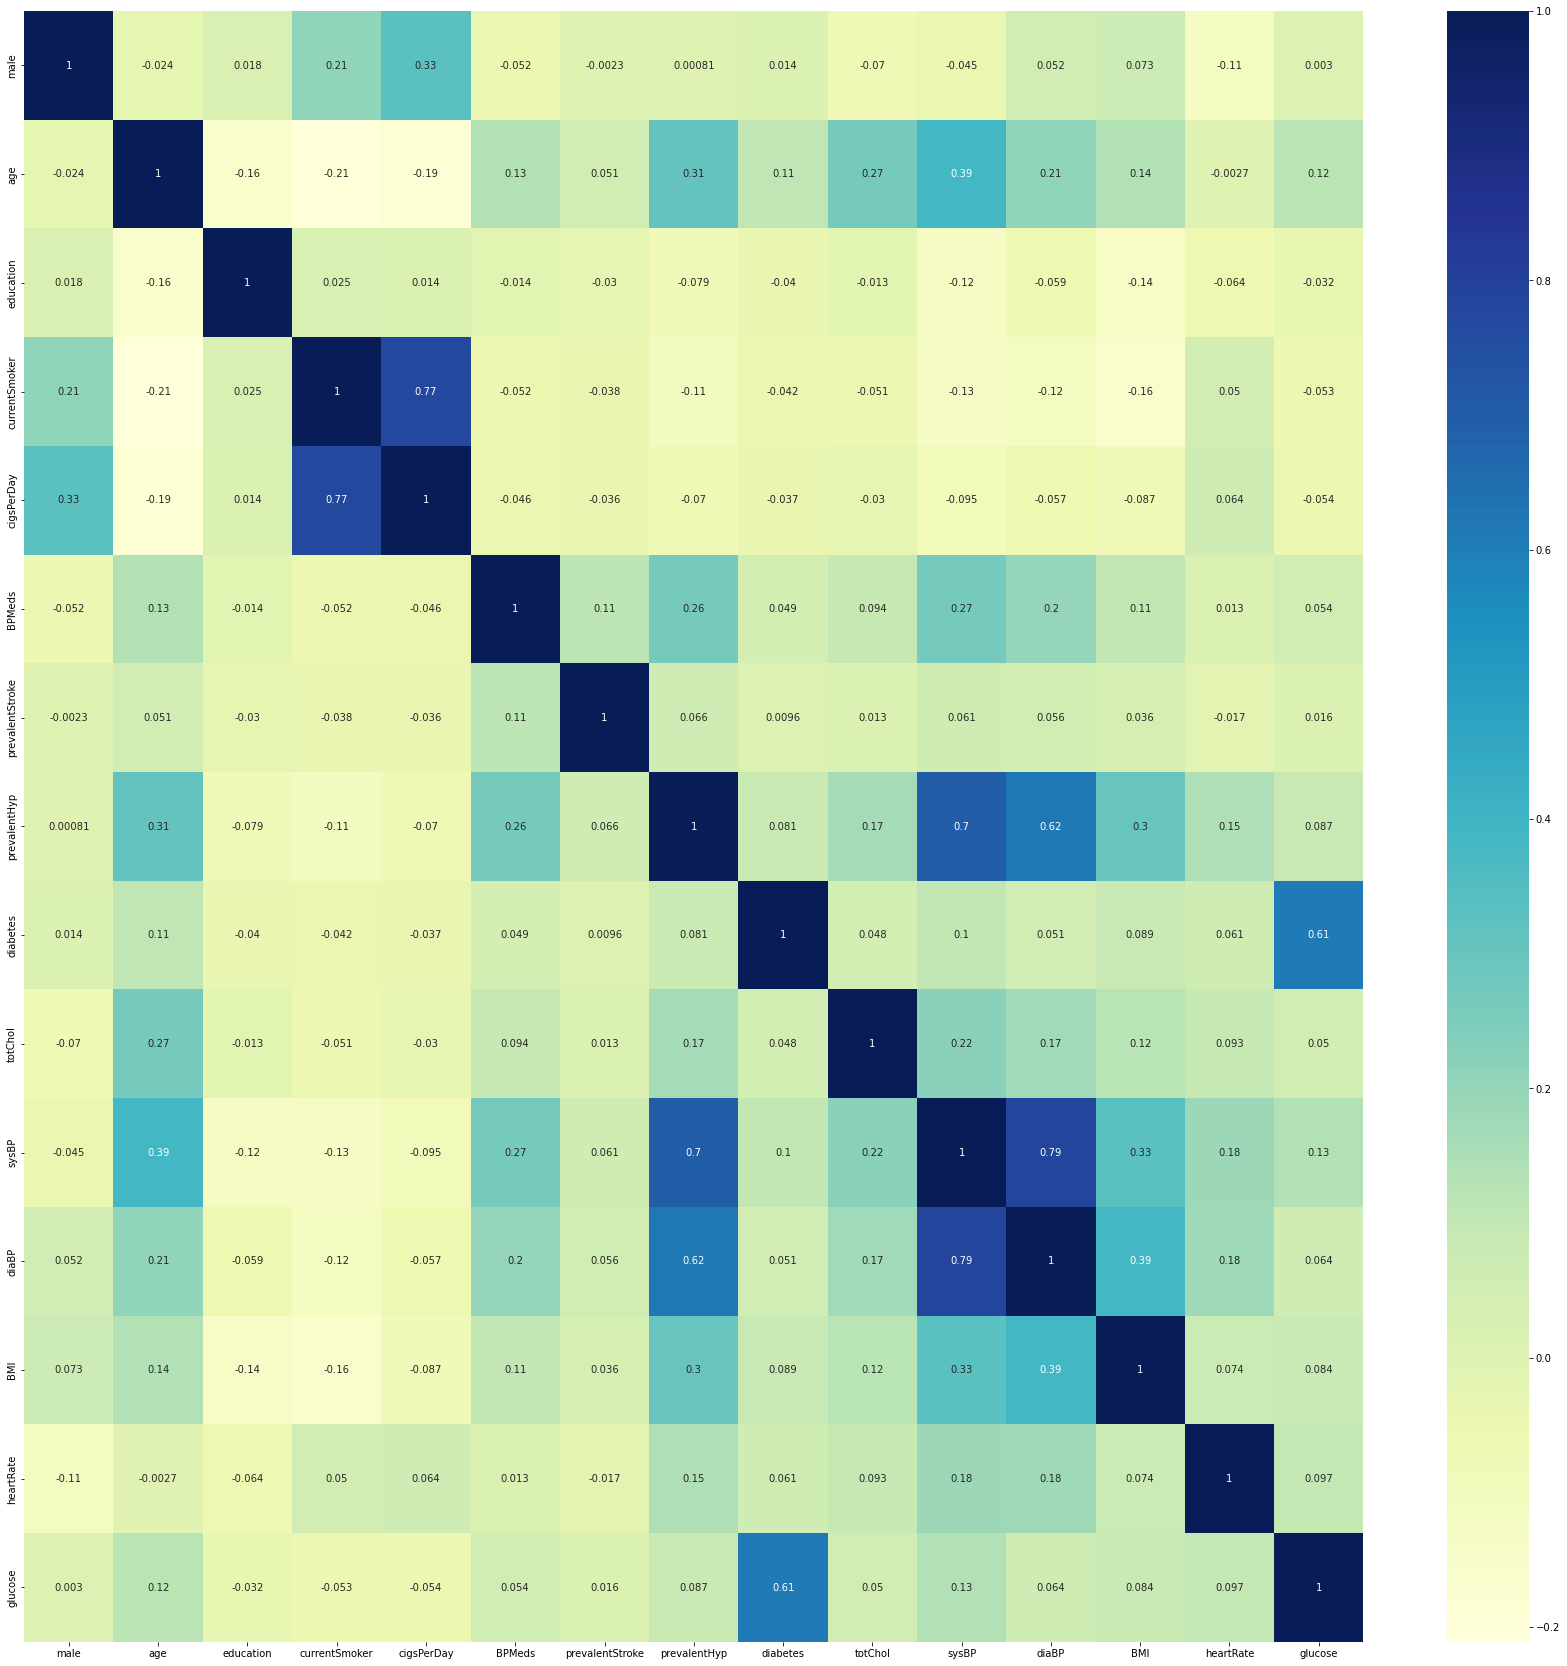

In [44]:
plt.figure(figsize = [30, 30]) 
dataplot = sns.heatmap(heart_disease_X.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [45]:
#### Comment here

print("There are no columns with correlation > 0.9")

There are no columns with correlation > 0.9


**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [46]:
### Code here

heart_disease_y = np.array(heart_disease_Y)
heart_disease_y


array([0, 0, 0, ..., 1, 0, 0])

In [47]:
# Splitting into Training, Validation and Testing Dataset

heart_X_dev, heart_X_test, heart_y_dev, heart_y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=0)
heart_X_train, heart_X_val, heart_y_train, heart_y_val = train_test_split(heart_X_dev, heart_y_dev, test_size=0.25, random_state=0)


In [48]:
# Scaling the data using Standard Scaler

heart_X_train = scaler.fit_transform(heart_X_train)   
heart_X_val = scaler.transform(heart_X_val)       
heart_X_test = scaler.transform(heart_X_test)   

In [49]:
# Adding a column of ones

heart_X_train = np.hstack([np.ones((heart_X_train.shape[0], 1)), heart_X_train])
heart_X_val = np.hstack([np.ones((heart_X_val.shape[0], 1)), heart_X_val])
heart_X_test = np.hstack([np.ones((heart_X_test.shape[0], 1)), heart_X_test])

print(heart_X_train[:5], '\n\n', heart_y_train[:5])

[[ 1.          1.10947093  1.4718344  -0.96232538 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.60079213  0.12520652
  -0.24664238  0.51694627 -2.15100438 -0.07698024]
 [ 1.         -0.90133051 -1.12062745  0.00308155  1.04334626  0.10455836
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.49865133 -0.89891325
  -0.54085384  0.33957544 -0.07171784 -0.20135476]
 [ 1.         -0.90133051 -0.76710993  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.62322976 -0.05685922
  -0.16258197 -0.44627585  2.00756869  0.50343415]
 [ 1.          1.10947093 -0.64927075  0.96848849  1.04334626  1.20898754
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.75785549 -0.78512217
  -0.58288404 -0.41425056  0.34413946 -0.20135476]
 [ 1.         -0.90133051 -1.59198415  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.65571468 -1.14925364
  -0.79303508 -1.04736587 -0.07171784 -0.36718744]] 

 [

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [50]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

In [51]:
heart_y_train = heart_y_train.reshape([2193,1])

In [52]:
### Code here

lor = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = lor.train(heart_X_train, heart_y_train)
accuracy_score(heart_y_train, lor.predict(heart_X_train))

0.8645690834473324

In [53]:
loss = np.array(loss)
loss = loss.reshape([100,1])

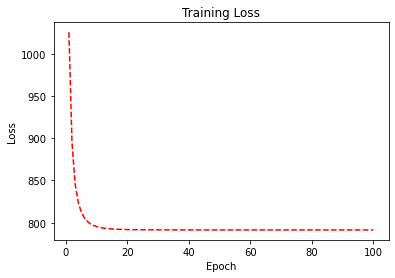

In [54]:
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show();

In [55]:
# Tuning the hyperparameters

alpha = []
for i in range(20):
    alpha.append(random.random())
eta = []
for i in range(20):
    eta.append(random.uniform(0,0.001))
t = []
for i in range(20):
    t.append(random.randint(0,100))
    
val_scores = []
for a,b,c in zip(alpha,eta,t):
    lor_heart = LogisticRegression(alpha = a, eta = b, t = c)
    lor_heart.train(heart_X_train, heart_y_train)
    val_scores.append(accuracy_score(heart_y_train, lor_heart.predict(heart_X_train)))

In [56]:
# Finding the best parameters

parameters = pd.DataFrame()
parameters['alpha'] = alpha
parameters['eta'] = eta
parameters['t'] = t
parameters['score'] = val_scores
parameters.sort_values('score', ascending = False)
parameters.reset_index(inplace = True)
parameters

,index,alpha,eta,t,score
0,0,0.423855,0.000806,31,0.865937
1,1,0.606393,0.000704,9,0.861833
2,2,0.019193,0.000100,10,0.854537
3,3,0.301575,0.000919,27,0.865937
4,4,0.660174,0.000714,45,0.865025
5,5,0.290078,0.000999,71,0.864569
6,6,0.618015,0.000149,39,0.861377
7,7,0.428769,0.000868,61,0.864569
8,8,0.135474,0.000162,85,0.865025
9,9,0.298282,0.000616,97,0.865025


In [57]:
# Comparing the accuracies for the two models.

lor_heart2 = LogisticRegression(alpha = alpha[0], eta = eta[0], t = t[0])
lor_heart2.train(heart_X_train, heart_y_train)
y = lor_heart2.predict(heart_X_test)
print("New accuracy score: ", accuracy_score(heart_y_test, y))

lor.train(heart_X_train, heart_y_train)
y_lor = lor.predict(heart_X_test)
print("Previous accuracy score: ", accuracy_score(heart_y_test, y_lor))

New accuracy score:  0.8538251366120219
Previous accuracy score:  0.8538251366120219


**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

In [58]:
#### Comment here

print("Yes the new model is performing well and even better.")

Yes the new model is performing well and even better.


> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [59]:
### Code here

features_heart = []
features_heart = heart_disease_X.columns
features_heart = features_heart.insert(0,'bias')
features_heart

Index(['bias', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [60]:
w = []
for i in range(len(lor_heart.w)):
    w.append(lor_heart.w[i][0])
# w.append(lor_heart.w[1][0])
w

[-2.048438229496374,
 0.33401381037896294,
 0.47347004335924037,
 -0.056253226614045804,
 0.03253527052628646,
 0.1446441165302778,
 0.00940403438159861,
 0.09012108368084808,
 0.1033519279267856,
 0.0397041092160378,
 0.08663163399260776,
 0.39339658752929635,
 -0.015041815035806903,
 -0.03136451036525659,
 0.008991114249989069,
 0.12407649350631066]

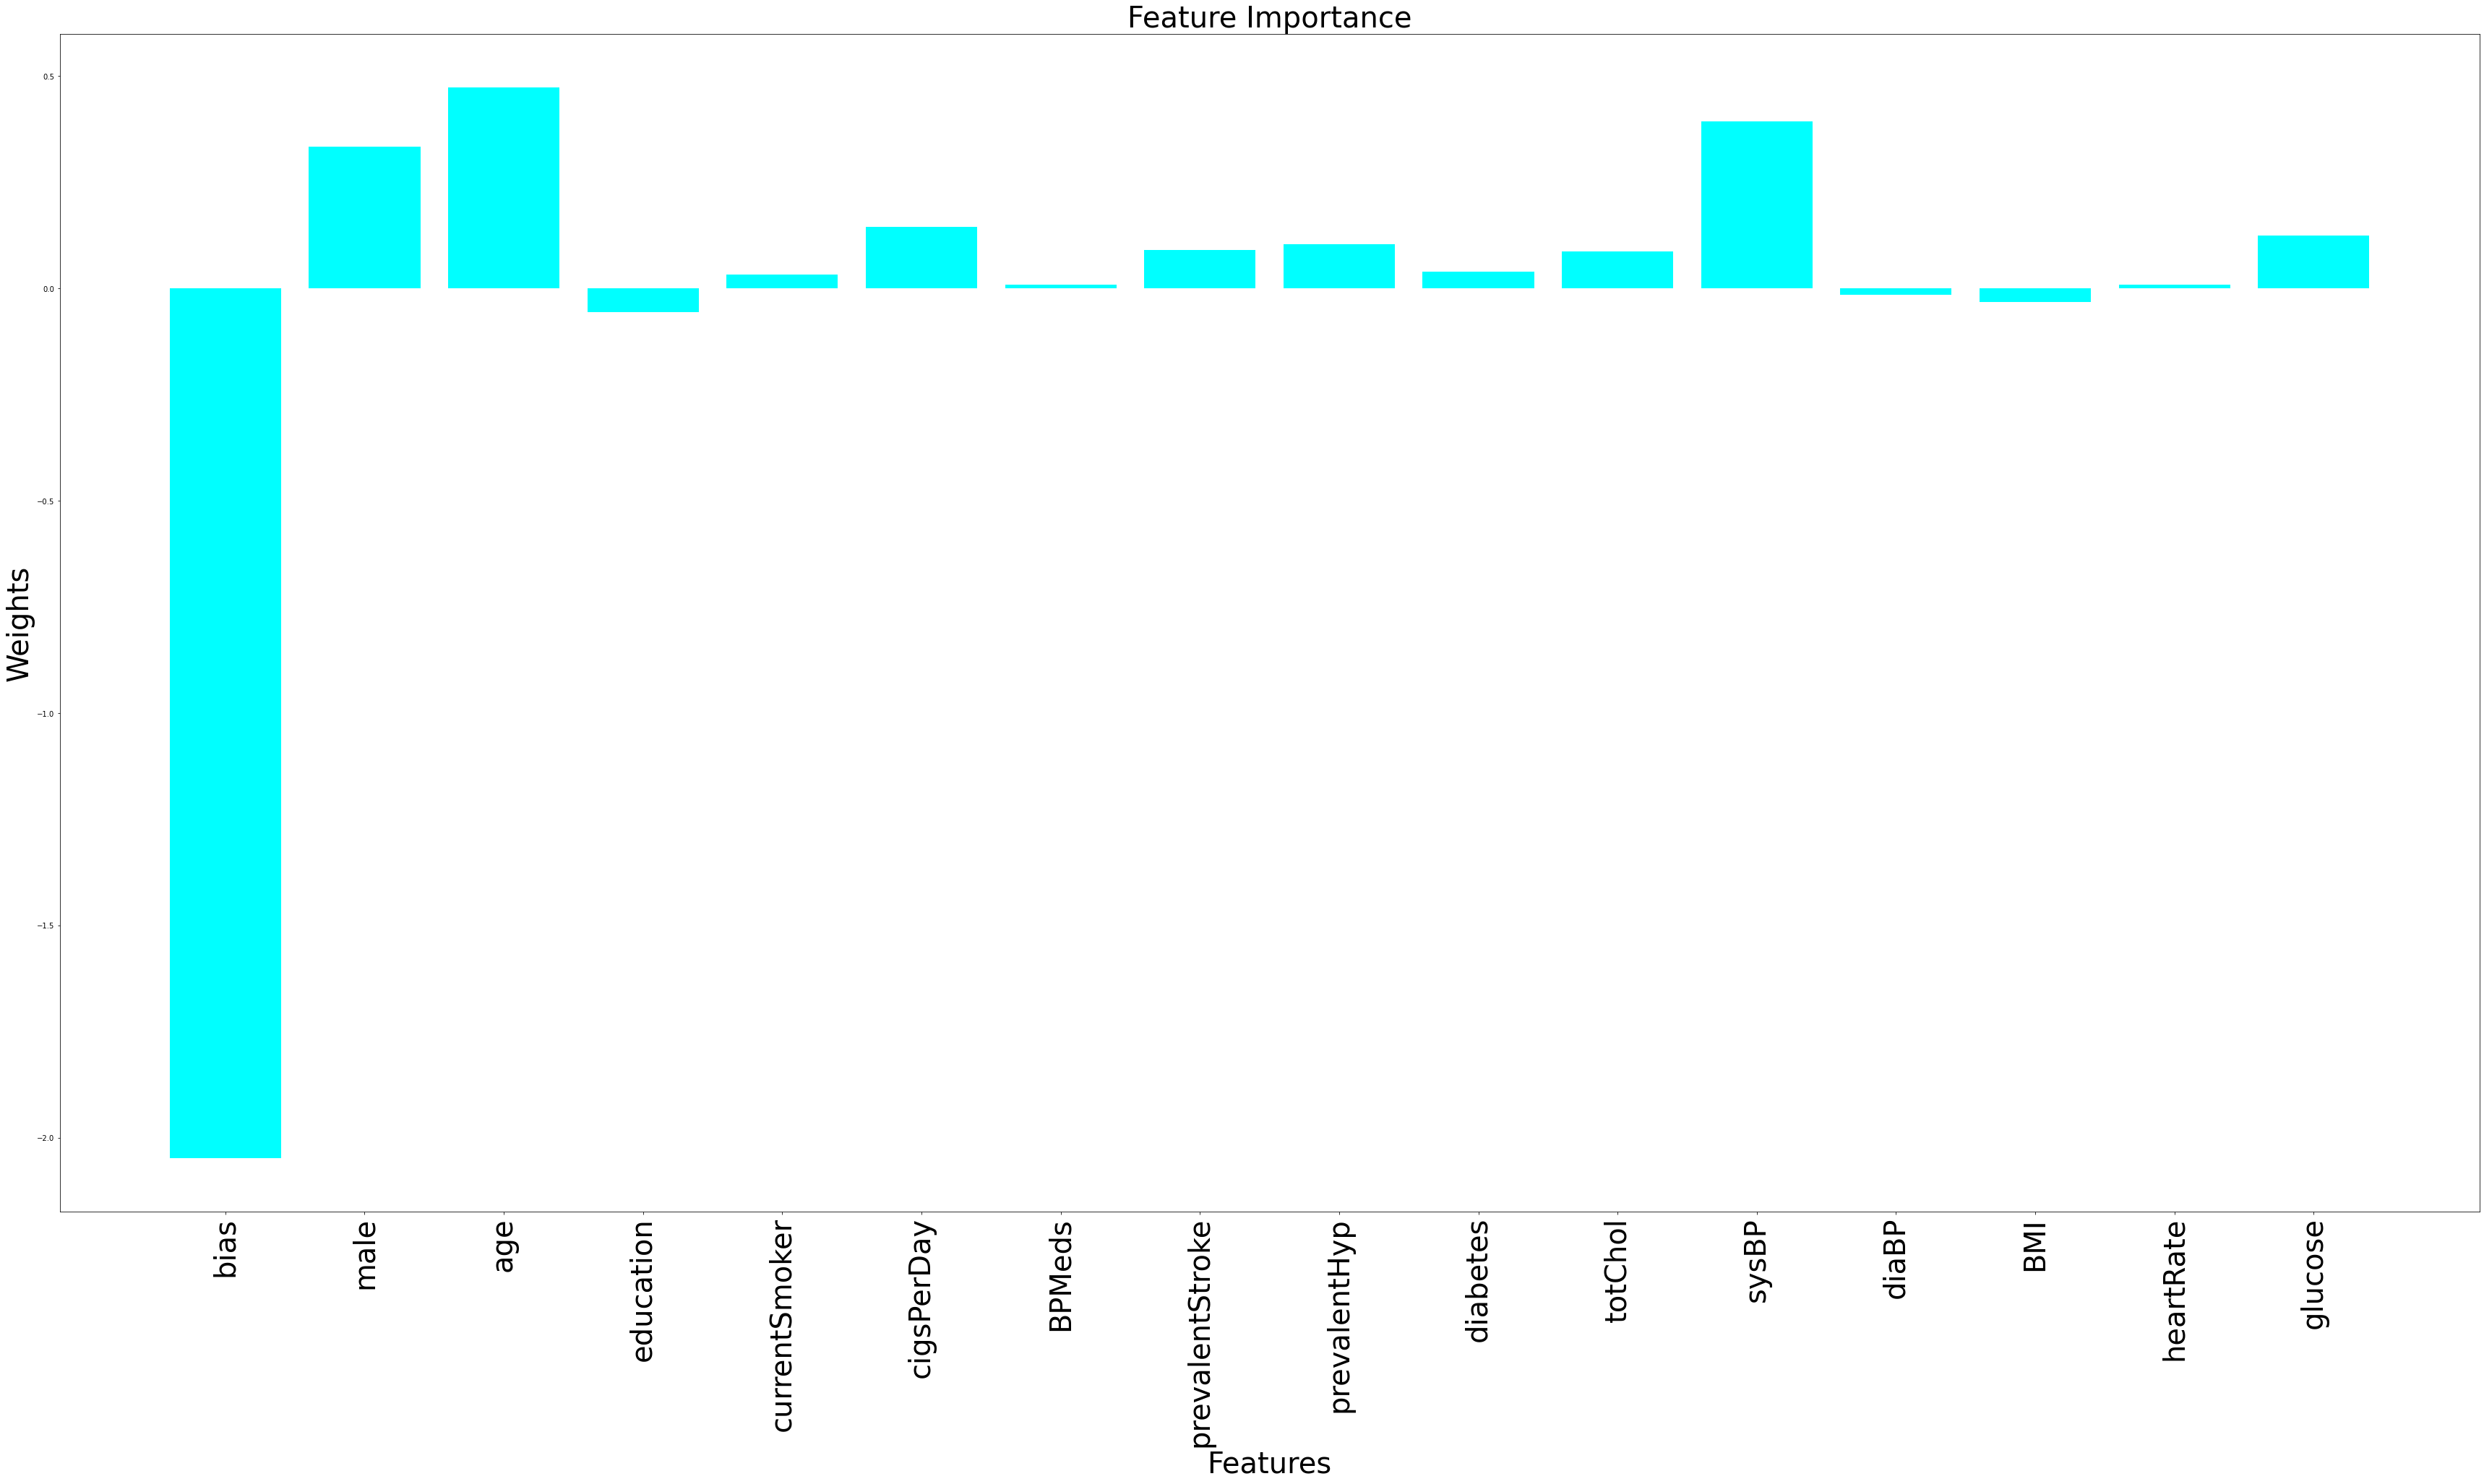

In [61]:
plt.figure(figsize = [60, 30]) 
x = features_heart
y = w
plt.bar(x, y, color ='cyan') 
plt.xlabel("Features", fontsize=40)
plt.ylabel("Weights", fontsize=40)
plt.title("Feature Importance", fontsize=40)
plt.xticks(rotation=90, fontsize=40)
plt.show()

In [62]:
#### Comment here

print("Age, sysBP have the maximum effect on the data.")

Age, sysBP have the maximum effect on the data.



# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [63]:
### Code here


sv = SVC().fit(heart_X_train,heart_y_train)

train_pred = sv.predict(heart_X_train)
test_pred = sv.predict(heart_X_test)
val_pred = sv.predict(heart_X_val)

print("Accuracy Training: ", sklearn.metrics.accuracy_score(heart_y_train, train_pred))
print("Accuracy Test: ", sklearn.metrics.accuracy_score(heart_y_test, test_pred))
print("Accuracy Val: ", sklearn.metrics.accuracy_score(heart_y_val, val_pred))

/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Training:  0.8682170542635659
Accuracy Test:  0.8497267759562842
Accuracy Val:  0.8166894664842681


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [64]:
### Code here

sv= SVC(kernel = 'linear').fit(heart_X_train, heart_y_train)

train_pred = sv.predict(heart_X_train)
test_pred = sv.predict(heart_X_test)
val_pred = sv.predict(heart_X_val)

print("Accuracy Training: ", sklearn.metrics.accuracy_score(heart_y_train, train_pred))
print("Accuracy Test: ", sklearn.metrics.accuracy_score(heart_y_test, test_pred))
print("Accuracy Val: ", sklearn.metrics.accuracy_score(heart_y_val, val_pred))

Accuracy Training:  0.8568171454628363
Accuracy Test:  0.8510928961748634
Accuracy Val:  0.8166894664842681


/Users/shrutiagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
